In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow

# Sharpening using smooth filters




> We've seen that smooth filters are used to blur and remove info from the image.
<br>
In this part your task is to do the opposite ! Use them to actually make the image sharper



- hint: $$
g_{\text{sharp}} = f + \gamma \left( f - h_{\text{blur}} * f \right)
$$


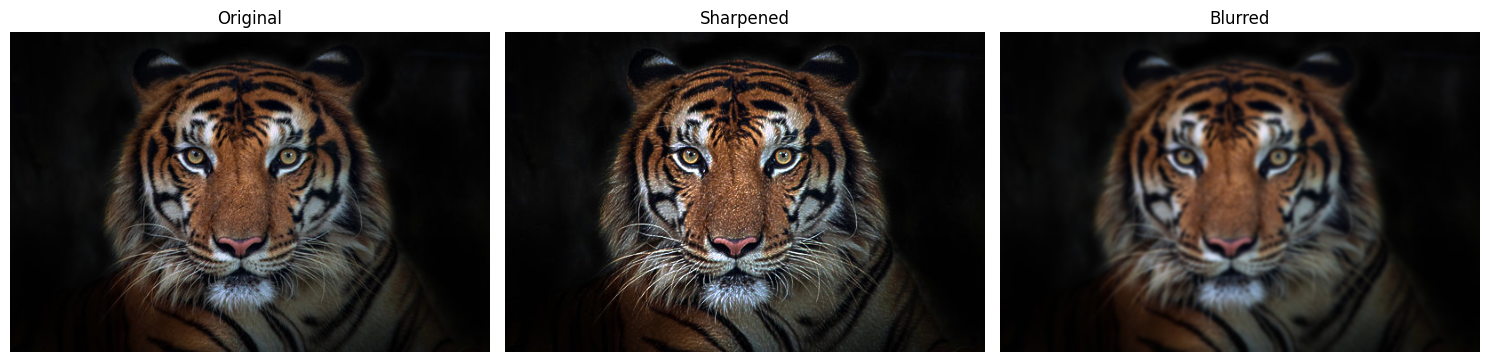

In [ ]:


def sharpen_image(image, kernel_size=(7, 7), gamma=2):
    # Gaussian blur
    blurred = cv2.GaussianBlur(image, kernel_size, 0)

    # Difference between original and blurred
    diff = cv2.subtract(image, blurred)

    # Apply gamma factor
    sharpened_detail = diff * gamma

    # Add sharpened detail back to the original
    sharp_image = cv2.add(image, sharpened_detail)

    sharp_image = np.clip(sharp_image, 0, 255).astype(np.uint8)

    return sharp_image, blurred



image = cv2.imread("tiger.jpg")
if image is not None:
  sharpened_img, blur = sharpen_image(image)
  # cv2_imshow(image)
  # cv2_imshow(sharpened_img)
  # cv2_imshow(blur)
  # this is because of vs code!
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  sharpened_rgb = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)
  blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

    # Display with matplotlib
  fig, axes = plt.subplots(1, 3, figsize=(15,5))
  axes[0].imshow(image_rgb)
  axes[0].set_title("Original")
  axes[0].axis('off')

  axes[1].imshow(sharpened_rgb)
  axes[1].set_title("Sharpened")
  axes[1].axis('off')

  axes[2].imshow(blur_rgb)
  axes[2].set_title("Blurred")
  axes[2].axis('off')

  plt.tight_layout()
  plt.show()
else:
    print("Error: Could not load image.")
  

# Morphological Edge Detection

- Extract clean object boundaries by subtracting eroded image from its dilated version


(np.float64(-0.5), np.float64(799.5), np.float64(532.5), np.float64(-0.5))

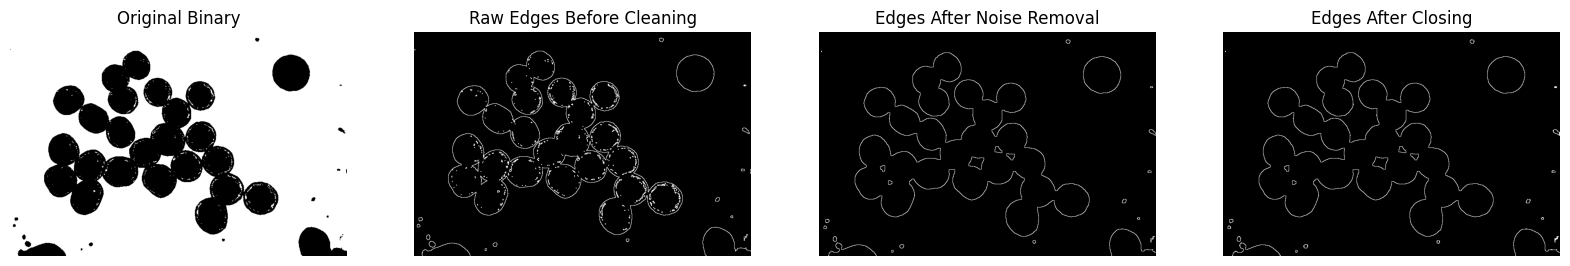

In [ ]:
# Read the image
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# Raw edges before noise removal
kernel = np.ones((2, 2), np.uint8)
dilated_raw = cv2.dilate(binary, kernel, iterations=1)
eroded_raw = cv2.erode(binary, kernel, iterations=1)
raw_edges_before_cleaning = cv2.subtract(dilated_raw, eroded_raw)

# I tried  to remove the noises inside the bacterias(actually the edges of bacteria)
# Remove noise inside shapes
kernel_noise = np.ones((2,2), np.uint8)
clean_binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_noise, iterations=4)# if you put 1 instead of one you can see the differences 

# Edges after noise removal 
dilated_clean = cv2.dilate(clean_binary, kernel, iterations=1)
eroded_clean = cv2.erode(clean_binary, kernel, iterations=1)
edges_after_cleaning = cv2.subtract(dilated_clean, eroded_clean)

# Clean edges with morphological closing 
closing_kernel = np.ones((3,3), np.uint8)
clean_edges = cv2.morphologyEx(edges_after_cleaning, cv2.MORPH_CLOSE, closing_kernel)


#  Show results
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(binary, cmap='gray')
plt.title('Original Binary')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(raw_edges_before_cleaning, cmap='gray')
plt.title('Raw Edges Before Cleaning')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(edges_after_cleaning, cmap='gray')
plt.title('Edges After Noise Removal')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(clean_edges, cmap='gray')
plt.title('Edges After Closing')
plt.axis('off')

# Count bacteria

bonus:
- find a way to calculate the kernel size automatically (based on overlaps or cell sizes for example)
- reconstruct cells by dilation after counting them

Number of bacteria detected (excluding background): 26


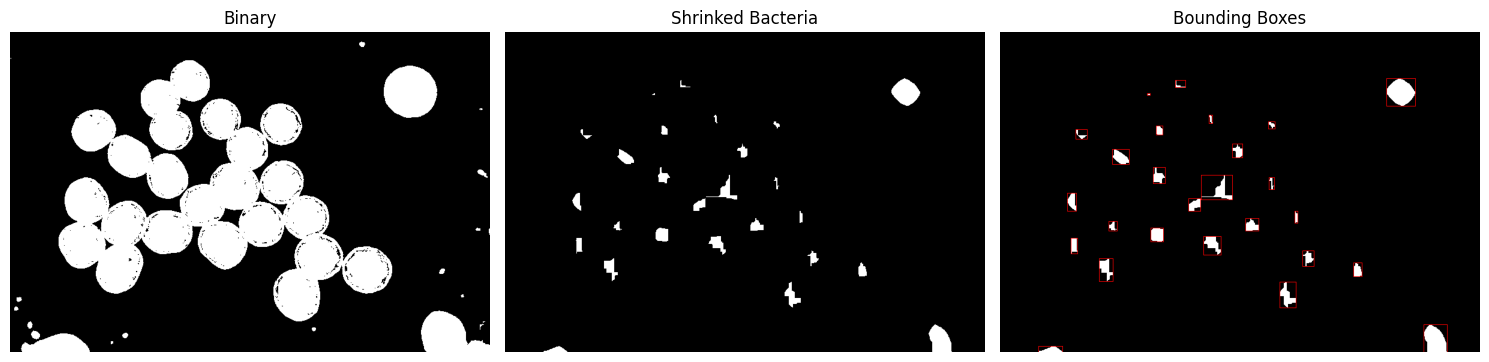

In [ ]:
# Load image (grayscale)
img = cv2.imread("bacteria.jpg", cv2.IMREAD_GRAYSCALE)

# Otsu thresholding
# For black and white image:
_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Flip the colors (for morphology)
binary = cv2.bitwise_not(binary)

# I did work on the kernels and iterations to get the best result!

#  Remove noise with erosion 
kernel_noise = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))  # small kernel
erode = cv2.erode(binary, kernel_noise, iterations=8)


# Shrink bacter beside erosion i used this one to make smoother shapes
kernel_shrink = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
shrinked = cv2.erode(erode, kernel_shrink, iterations=2)  # makes bacteria smaller

#  Connected components 
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(shrinked)
print(f"Number of bacteria detected (excluding background): {num_labels-1}")

#  Draw bounding boxes 
output = cv2.cvtColor(shrinked, cv2.COLOR_GRAY2RGB)
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > 2:  # ignore very tiny noise
        cv2.rectangle(output, (x, y), (x+w, y+h), (255,0,0), 1)

# Display
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].imshow(binary, cmap='gray'); axes[0].set_title("Binary")
axes[1].imshow(shrinked, cmap='gray'); axes[1].set_title("Shrinked Bacteria")
axes[2].imshow(output); axes[2].set_title("Bounding Boxes")

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Optional



> Learn as much as you want about CNNs and ask mentors (CNNs will be taught in future sessions)



# Sources:
- Computer Vision: Algorithms and Applications
- Dr. Karimi videos
- Google
- My own knowledge